#### Explorando o Seaborn em uma análise de dados


A base de dados utilizada aqui é de churn de clientes de uma empresa de telecomunicações. Churn é uma métrica para indicar clientes que deixaram de contratar o serviço da empresa. Através das visualizações do Seaborn, vamos tentar identificar os fatores que levam os clientes a cancelar o serviço.
Temos o seguinte dicionário de dados:

- `id_cliente`: identificador único do cliente
- `genero`: gênero do cliente
- `idoso`: indica se o cliente é idoso (mais de 65 anos) ou não
- `tem_parceiro`: indica se o cliente tem parceiro ou não
- `tem_dependentes`: indica se o cliente tem dependentes ou não
- `meses_na_empresa`: quantidade de meses que o cliente permaneceu na empresa
- `servico_telefone`: indica se o cliente tem serviço de telefone ou não
- `multiplas_linhas`: indica se o cliente tem múltiplas linhas ou não
- `servico_internet`: indica se o cliente tem serviço de internet (DSL ou fibra óptica) ou não
- `servico_seguranca`: indica se o cliente tem serviço de segurança online ou não
- `servico_backup`: indica se o cliente tem serviço de backup online ou não
- `servico_protecao_equipamento`: indica se o cliente tem serviço de proteção do equipamento de conexão ou não
- `servico_suporte_tecnico`: indica se o cliente tem serviço de suporte técnico prioritário ou não
- `streaming_tv`: indica se o cliente tem serviço de streaming de TV ou não
- `streaming_filmes`: indica se o cliente tem serviço de streaming de filmes ou não
- `contrato`: tipo de contrato do cliente (mensal, anual ou dois anos)
- `fatura_digital`: indica se o cliente recebe a fatura por e-mail ou não
- `forma_pagamento`: forma de pagamento do cliente (cheque, boleto, transferência bancária ou cartão de crédito)
- `valor_mensal`: valor mensal do serviço contratado
- `total_gasto`: valor total gasto pelo cliente
- `churn`: indica se o cliente cancelou o serviço no mês anterior ou não



In [1]:
### Importando as bibliotecas e o arquivo

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

ARQUIVO_DADOS = 'churn_clientes.csv'

df_churn = pd.read_csv(ARQUIVO_DADOS)
df_churn.head()


,id_cliente,genero,idoso,tem_parceiro,tem_dependentes,meses_na_empresa,servico_telefone,multiplas_linhas,servico_internet,servico_seguranca,...,servico_protecao_equipamento,servico_suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_digital,forma_pagamento,valor_mensal,total_gasto,churn
0,7590-VHVEG,Feminino,Não,Sim,Não,1,Não,Não,DSL,Não,...,Não,Não,Não,Não,Mensal,Sim,Boleto,29.85,29.85,Não
1,5575-GNVDE,Masculino,Não,Não,Não,34,Sim,Não,DSL,Sim,...,Sim,Não,Não,Não,Anual,Não,Cheque,56.95,1889.50,Não
2,3668-QPYBK,Masculino,Não,Não,Não,2,Sim,Não,DSL,Sim,...,Não,Não,Não,Não,Mensal,Sim,Cheque,53.85,108.15,Sim
3,7795-CFOCW,Masculino,Não,Não,Não,45,Não,Não,DSL,Sim,...,Sim,Sim,Não,Não,Anual,Não,Transferencia,42.30,1840.75,Não
4,9237-HQITU,Feminino,Não,Não,Não,2,Sim,Não,Fibra optica,Não,...,Não,Não,Não,Não,Mensal,Sim,Boleto,70.70,151.65,Sim


In [2]:
df_churn.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_cliente                    7043 non-null   object 
 1   genero                        7043 non-null   object 
 2   idoso                         7043 non-null   object 
 3   tem_parceiro                  7043 non-null   object 
 4   tem_dependentes               7043 non-null   object 
 5   meses_na_empresa              7043 non-null   int64  
 6   servico_telefone              7043 non-null   object 
 7   multiplas_linhas              7043 non-null   object 
 8   servico_internet              7043 non-null   object 
 9   servico_seguranca             7043 non-null   object 
 10  servico_backup                7043 non-null   object 
 11  servico_protecao_equipamento  7043 non-null   object 
 12  servico_suporte_tecnico       7043 non-null   object 
 13  str

In [3]:
df_churn.describe() 

,meses_na_empresa,valor_mensal,total_gasto
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [4]:
## ver informações descritivas sobre variáveis não-numéricas (categóricas)
df_churn.describe(exclude='number') 

,id_cliente,genero,idoso,tem_parceiro,tem_dependentes,servico_telefone,multiplas_linhas,servico_internet,servico_seguranca,servico_backup,servico_protecao_equipamento,servico_suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_digital,forma_pagamento,churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,2,3,2,2,2,2,2,2,3,2,4,2
top,7590-VHVEG,Masculino,Não,Não,Não,Sim,Não,Fibra optica,Não,Não,Não,Não,Não,Não,Mensal,Sim,Boleto,Não
freq,1,3555,5901,3641,4933,6361,4072,3096,5024,4614,4621,4999,4336,4311,3875,4171,2365,5174


In [5]:
df_churn['churn'].value_counts()

churn
Não    5174
Sim    1869
Name: count, dtype: int64

In [6]:
df_churn['churn'].value_counts(normalize=True) * 100 

churn
Não    73.463013
Sim    26.536987
Name: proportion, dtype: float64

In [7]:
# a coluna "id_cliente" não é necessária para a análise (após verificar-se que não contém duplicatas, ou seja, que cada linha corresponde a um cliente)
df_churn = df_churn.drop(columns='id_cliente', axis=1)
df_churn.head() 

,genero,idoso,tem_parceiro,tem_dependentes,meses_na_empresa,servico_telefone,multiplas_linhas,servico_internet,servico_seguranca,servico_backup,servico_protecao_equipamento,servico_suporte_tecnico,streaming_tv,streaming_filmes,contrato,fatura_digital,forma_pagamento,valor_mensal,total_gasto,churn
0,Feminino,Não,Sim,Não,1,Não,Não,DSL,Não,Sim,Não,Não,Não,Não,Mensal,Sim,Boleto,29.85,29.85,Não
1,Masculino,Não,Não,Não,34,Sim,Não,DSL,Sim,Não,Sim,Não,Não,Não,Anual,Não,Cheque,56.95,1889.50,Não
2,Masculino,Não,Não,Não,2,Sim,Não,DSL,Sim,Sim,Não,Não,Não,Não,Mensal,Sim,Cheque,53.85,108.15,Sim
3,Masculino,Não,Não,Não,45,Não,Não,DSL,Sim,Não,Sim,Sim,Não,Não,Anual,Não,Transferencia,42.30,1840.75,Não
4,Feminino,Não,Não,Não,2,Sim,Não,Fibra optica,Não,Não,Não,Não,Não,Não,Mensal,Sim,Boleto,70.70,151.65,Sim


Podemos separar as variáveis em numéricas e categóricas, pois esses diferentes tipos de variáveis requerem diferentes tipos de análises e visualizações.

In [8]:
colunas_numericas = df_churn.select_dtypes(include='number').columns
colunas_categoricas = df_churn.select_dtypes(exclude='number').columns

print(colunas_numericas)
print(colunas_categoricas) 

Index(['meses_na_empresa', 'valor_mensal', 'total_gasto'], dtype='object')
Index(['genero', 'idoso', 'tem_parceiro', 'tem_dependentes',
       'servico_telefone', 'multiplas_linhas', 'servico_internet',
       'servico_seguranca', 'servico_backup', 'servico_protecao_equipamento',
       'servico_suporte_tecnico', 'streaming_tv', 'streaming_filmes',
       'contrato', 'fatura_digital', 'forma_pagamento', 'churn'],
      dtype='object')


O `churn` é uma variável categórica, mas ela não será incluída na lista de variáveis categóricas porque ela é a variável alvo. Variável alvo é o nome dado à variável que queremos prever. Neste caso, queremos prever se um cliente vai cancelar o serviço ou não. Portanto, o `churn` não será incluído na lista de variáveis categóricas.

In [9]:
colunas_categoricas = colunas_categoricas.drop('churn')
print(colunas_categoricas)

Index(['genero', 'idoso', 'tem_parceiro', 'tem_dependentes',
       'servico_telefone', 'multiplas_linhas', 'servico_internet',
       'servico_seguranca', 'servico_backup', 'servico_protecao_equipamento',
       'servico_suporte_tecnico', 'streaming_tv', 'streaming_filmes',
       'contrato', 'fatura_digital', 'forma_pagamento'],
      dtype='object')


Histogramas (padrão do Pandas)

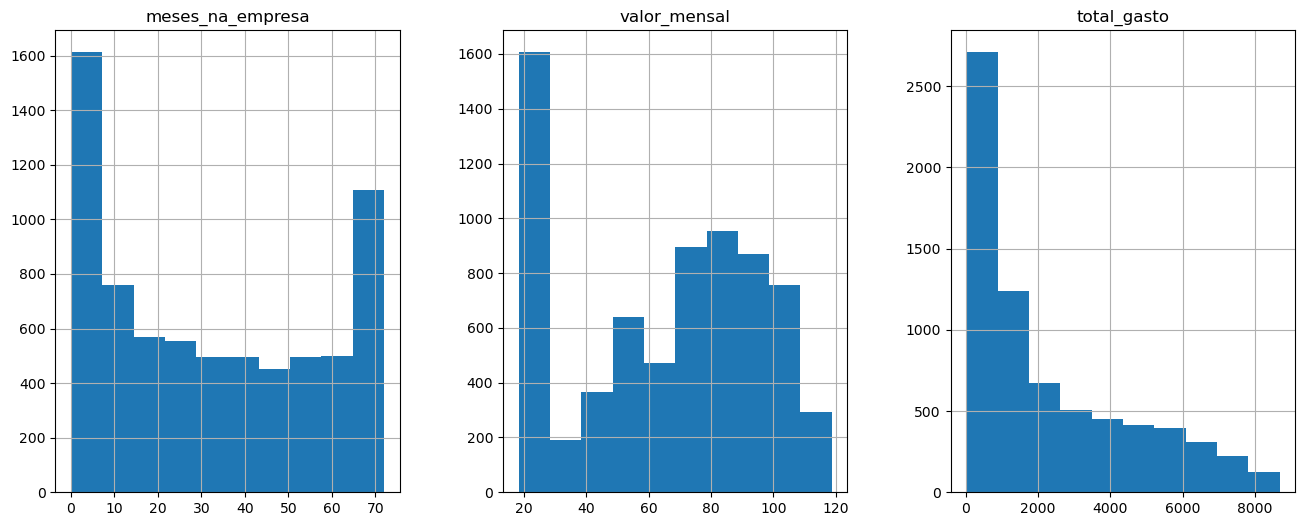

In [10]:
df_churn[colunas_numericas].hist(layout=(1,3), figsize=(16, 6));

A partir daqui, começamos a utilizar o Seaborn para gerar os gráficos.

In [11]:
#definindo um estilo padrão para os gráficos
sns.set_theme(style = 'dark', palette = 'bright', context = 'notebook')

Histograma do Seaborn (nota-se como já é mais bem desenhado). 

O argumento "hue" é bastante comum no Seaborn. É usado para adicionar uma dimensão extra ao gráfico, permitindo a distinção visual de dados baseados em uma terceira variável categórica. Ele divide os dados em subgrupos e aplica uma cor diferente a cada um, facilitando a comparação dentro de um mesmo gráfico.

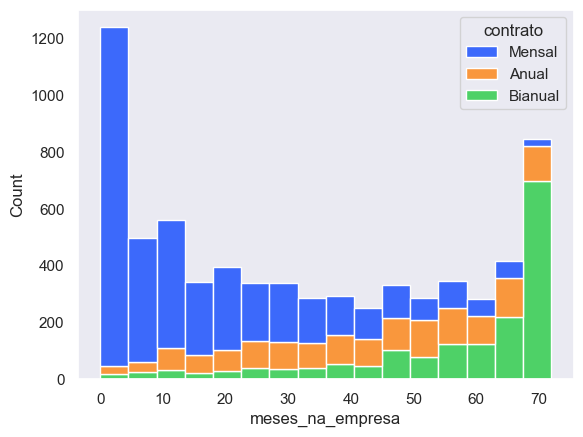

In [12]:
sns.histplot(x='meses_na_empresa', data=df_churn, hue='contrato', multiple='stack');

Como o seaborn é construído em cima do matplotlib, também é possível trabalhar com os objetos e figuras, principalmente quando se deseja exibir vários gráficos de uma vez:

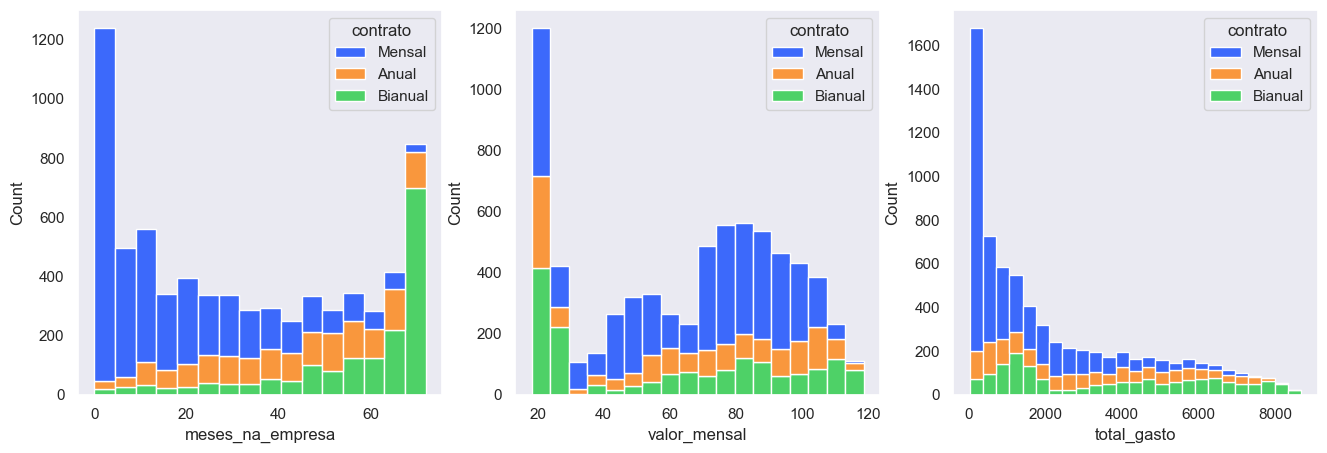

In [13]:
fig, axs = plt.subplots(nrows=1, ncols = 3, figsize = (16,5))

for i, coluna in enumerate(colunas_numericas):
    sns.histplot(x=coluna, data=df_churn, hue='contrato', multiple='stack', ax=axs[i])
    
plt.show()
    

#### KDE


O gráfico KDE (Kernel Density Estimate) no Seaborn é uma representação suave da distribuição de dados contínuos. Ele estima a densidade de probabilidade de uma variável, criando uma curva suave que mostra onde os valores dos dados estão concentrados. Diferente de um histograma, que agrupa os dados em intervalos, o KDE proporciona uma visualização mais fluida das tendências e padrões na distribuição dos dados, tornando-o útil para identificar modos, dispersões e outras características importantes da distribuição.

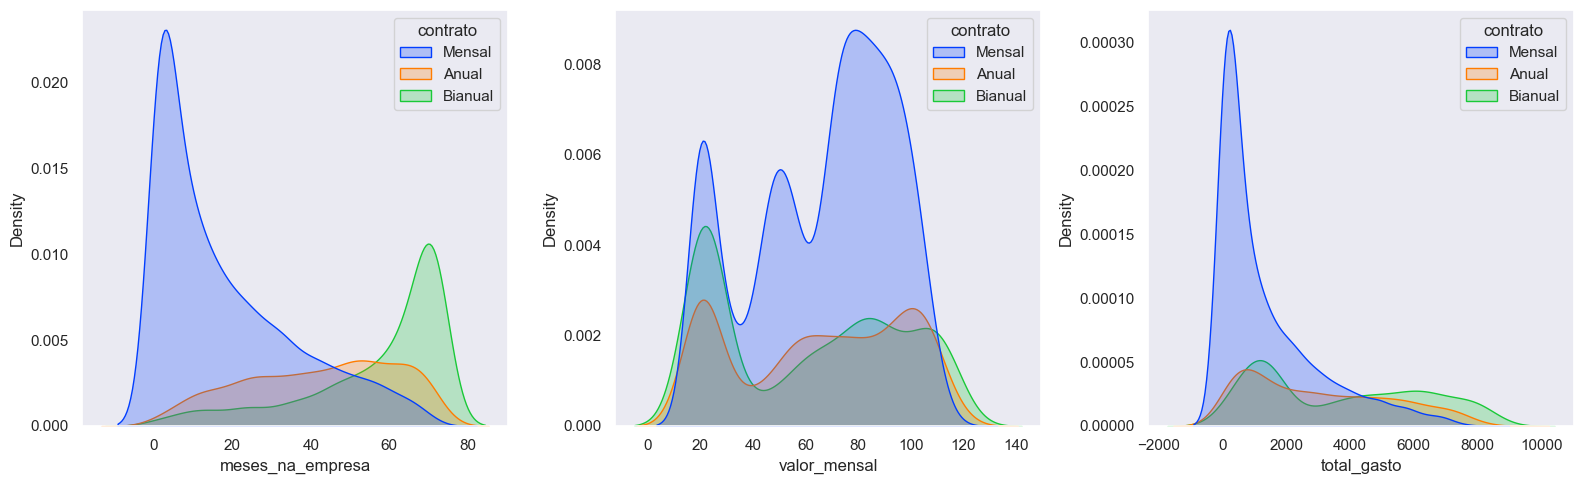

In [14]:
fig, axs = plt.subplots(nrows=1, ncols = 3, figsize = (16,5), tight_layout=True)

for i, coluna in enumerate(colunas_numericas):
    sns.kdeplot(x=coluna, data=df_churn, hue='contrato', ax=axs[i], fill=True)
    
plt.show()

Podemos unificar as legendas, já que repetimos a variável no argumento "hue" 

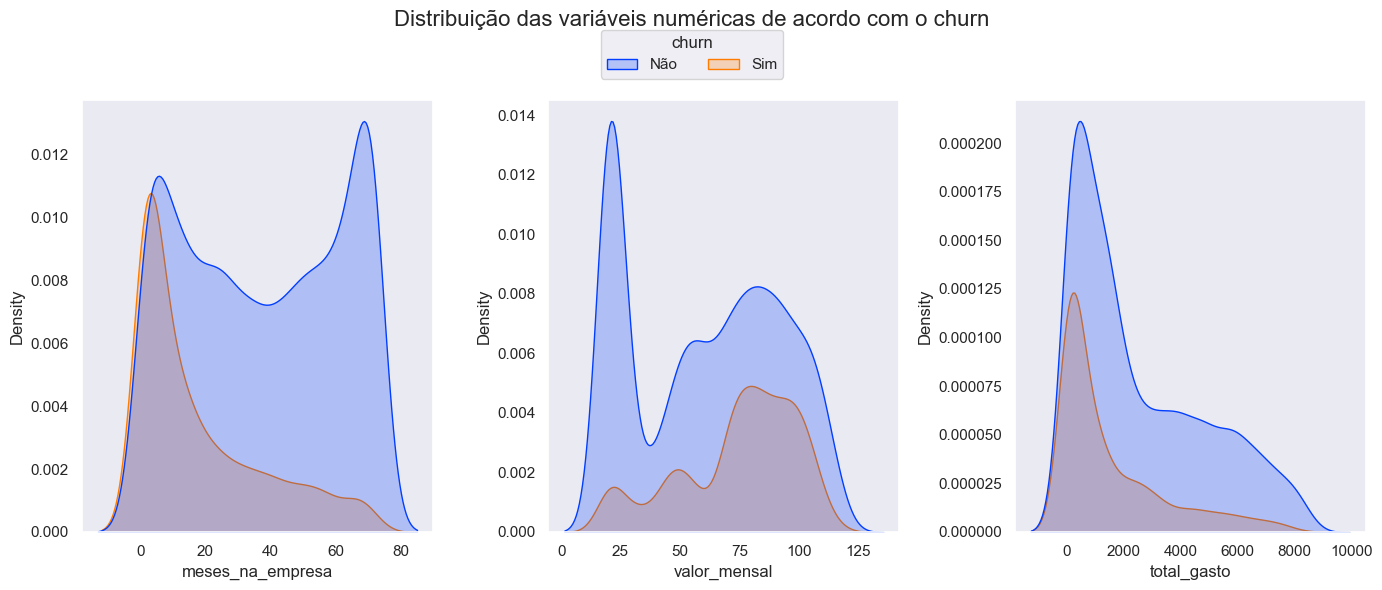

In [15]:
fig, axs = plt.subplots(nrows=1, ncols = 3, figsize = (14,6), tight_layout=True)

#removendo a legenda de cada subplot individual (guardando o seu valor)
for i, coluna in enumerate(colunas_numericas):
    sns.kdeplot(x=coluna, data=df_churn, hue='churn', ax=axs[i], fill=True)
    legenda = axs[i].get_legend()
    legenda.remove()
    
# recuperando o valor da legenda    
rotulos = [text.get_text() for text in legenda.get_texts()]

# formatando a legenda da fig e adicionando um título para a mesma. As linhas puladas com \n são para acertar o espaço entre título e os gráficos, para que a legenda não os sobreponha
fig.legend(handles = legenda.legend_handles, labels=rotulos, loc = 'upper center', ncols = 2, title = 'churn', bbox_to_anchor = (0.5, 0.96))
fig.suptitle('Distribuição das variáveis numéricas de acordo com o churn\n\n', fontsize=16)
    
plt.show()

#### Facetgrid
O facetgrid é uma ferramenta poderosa para comparar padrões em diferentes subconjuntos de uma variável. Podemos por exemplo pegar uma variável numérica e ver como ela se comporta ao ser dividida em subgrupos de variáveis categóricas

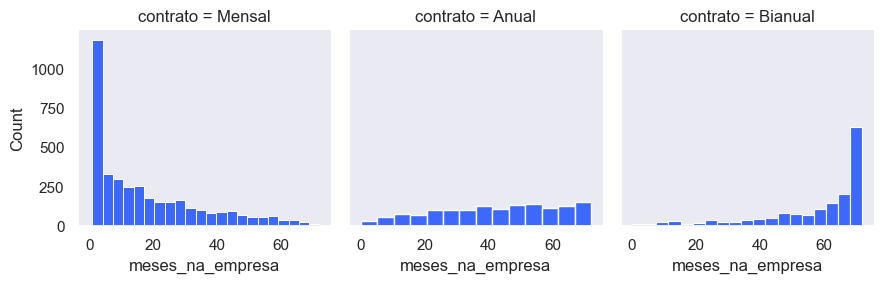

In [16]:
# comparando apenas em 1 dimensão categórica (contrato)
g = sns.FacetGrid(df_churn, col='contrato')
g.map_dataframe(sns.histplot, x='meses_na_empresa');

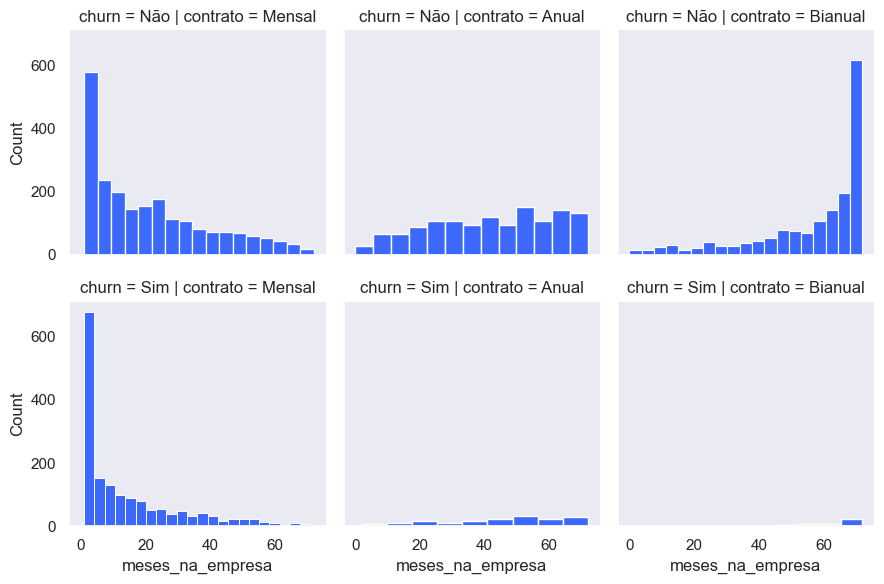

In [17]:
# comparando em 2 dimensões categóricas (contrato e churn)
g = sns.FacetGrid(df_churn, col='contrato', row='churn')
g.map_dataframe(sns.histplot, x='meses_na_empresa');

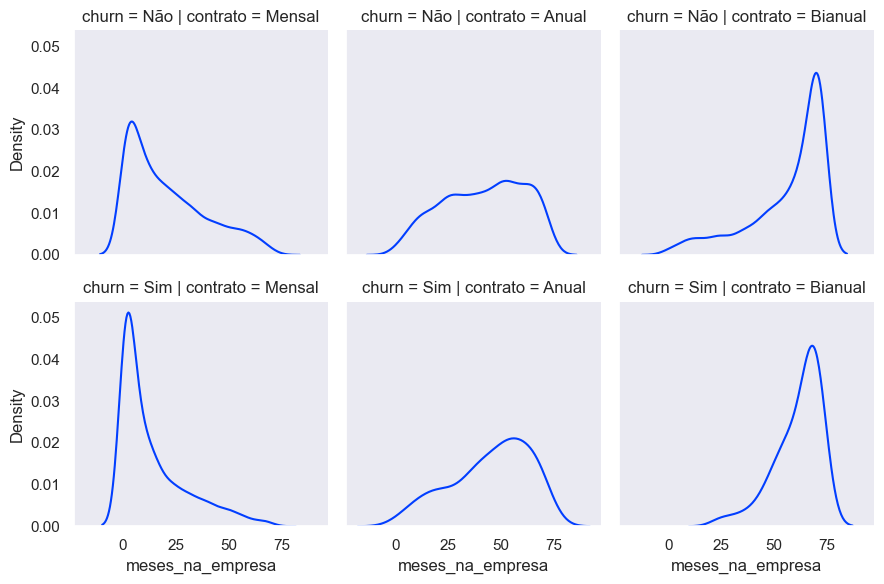

In [18]:
g = sns.FacetGrid(df_churn, col='contrato', row='churn')
g.map_dataframe(sns.kdeplot, x='meses_na_empresa');

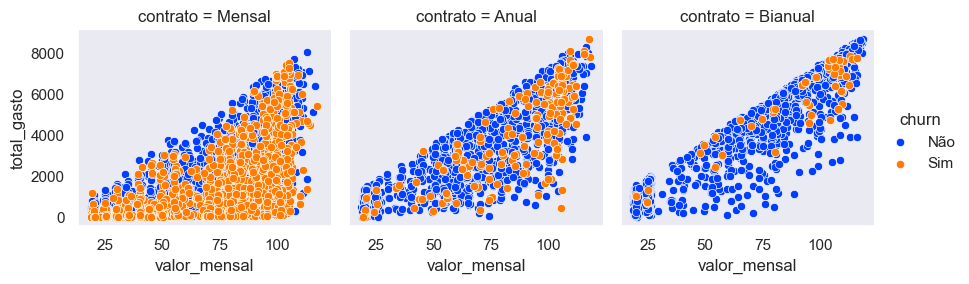

In [19]:
# utilizando o hue
g = sns.FacetGrid(df_churn, col='contrato', hue='churn')
g.map_dataframe(sns.scatterplot, x='valor_mensal', y='total_gasto')
g.add_legend();

#### Pairplot
O pairplot é usado para criar uma matriz de dispersão para cada par de variávies numéricas do dataframe. Na diagonal, onde uma variável seria comparada com ela mesma, fornece uma kde (por padrão) ou um histograma da respectiva variável.

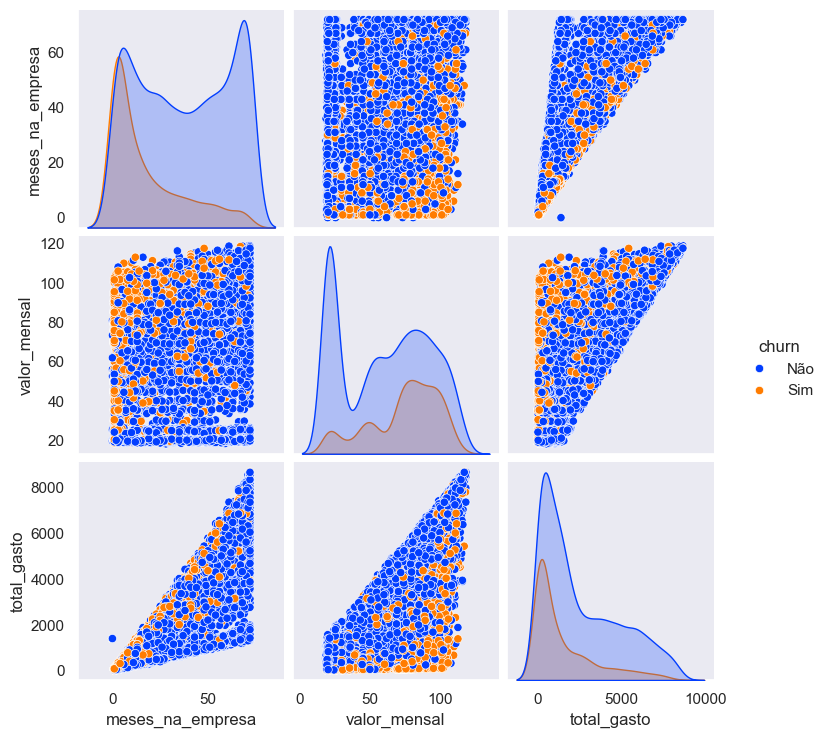

In [20]:
sns.pairplot(data = df_churn, hue = 'churn');

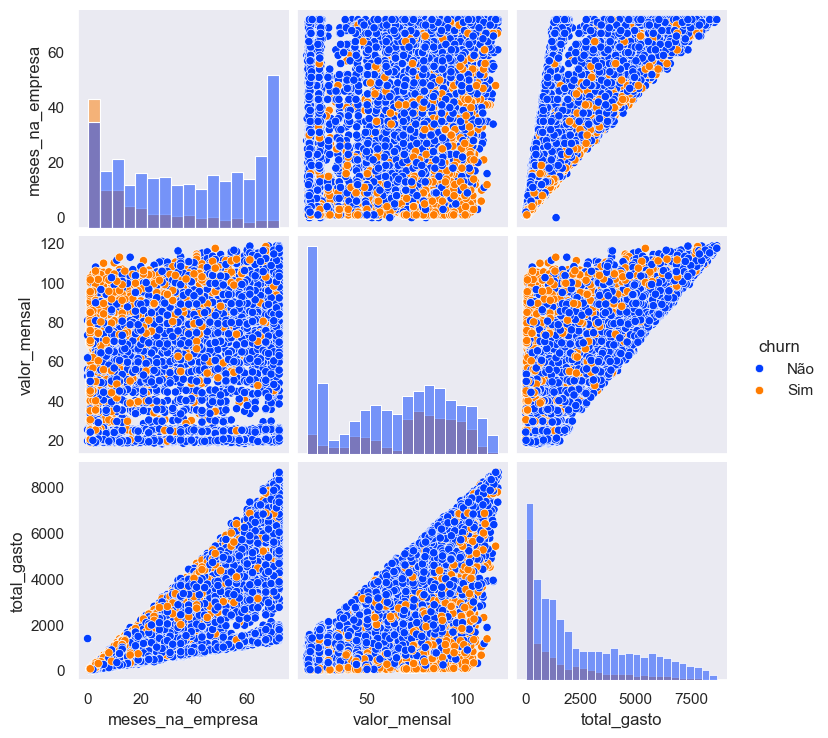

In [21]:
sns.pairplot(data = df_churn, hue = 'churn', diag_kind='hist');

#### Boxplot
Boxplot são úteis para visualizar a distribuição dos valores de uma variável numérica, mostrando de forma clara a mediana, primeiro e terceiro quartil e possíveis outliers. Por padrão, para o cálculo de outliers, se considera o intervalo interquartil (IQR), ou seja a diferença entre o terceiro (Q3) e o primeiro quartil (Q1). Um outlier seria um valor maior do que 13 + 1.5 * IQR ou menor que Q1 - 1,5 * IQR

Com o Seaborn, podemos facilmente subdividir a variável numérica em grupos de acordo com uma variável categórica. Podemos até mesmo acrescentar uma outra subdivisão utilizando o hue.

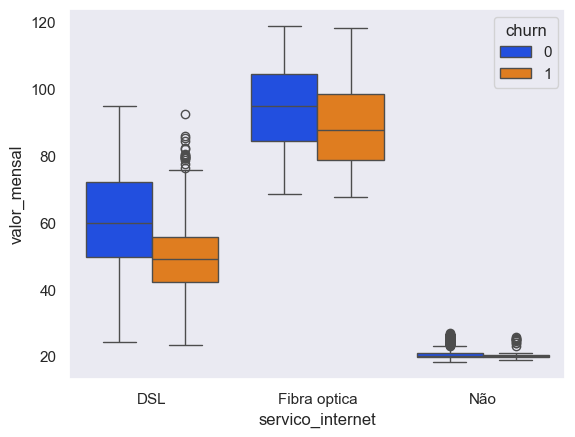

In [34]:
sns.boxplot(x='servico_internet', y = 'valor_mensal', data = df_churn, hue = 'churn');

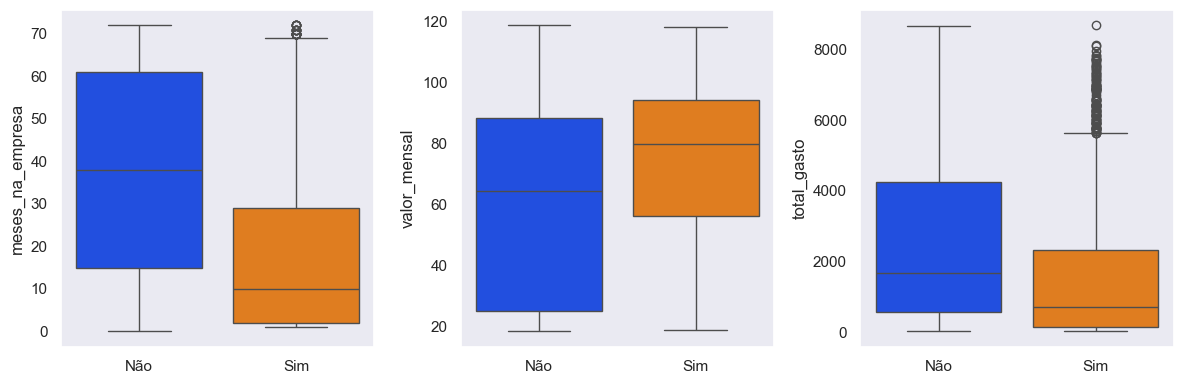

In [22]:
fig, axs = plt.subplots(nrows=1, ncols = 3, figsize = (12,4), tight_layout=True)

for i, coluna in enumerate(colunas_numericas):
    sns.boxplot(x = 'churn', y=coluna, data=df_churn, ax=axs[i], hue = 'churn')
    axs[i].set_xlabel('')
    
plt.show()

Retomando as variáveis categóricas.

Construiremos "historgramas" para as variáveis categóricas. Na verdade, serão barras 100% empilhadas, para mostrar a proporção do churn em cada grupo da respectiva variável

In [24]:
print(colunas_categoricas)
print(len(colunas_categoricas))

Index(['genero', 'idoso', 'tem_parceiro', 'tem_dependentes',
       'servico_telefone', 'multiplas_linhas', 'servico_internet',
       'servico_seguranca', 'servico_backup', 'servico_protecao_equipamento',
       'servico_suporte_tecnico', 'streaming_tv', 'streaming_filmes',
       'contrato', 'fatura_digital', 'forma_pagamento'],
      dtype='object')
16


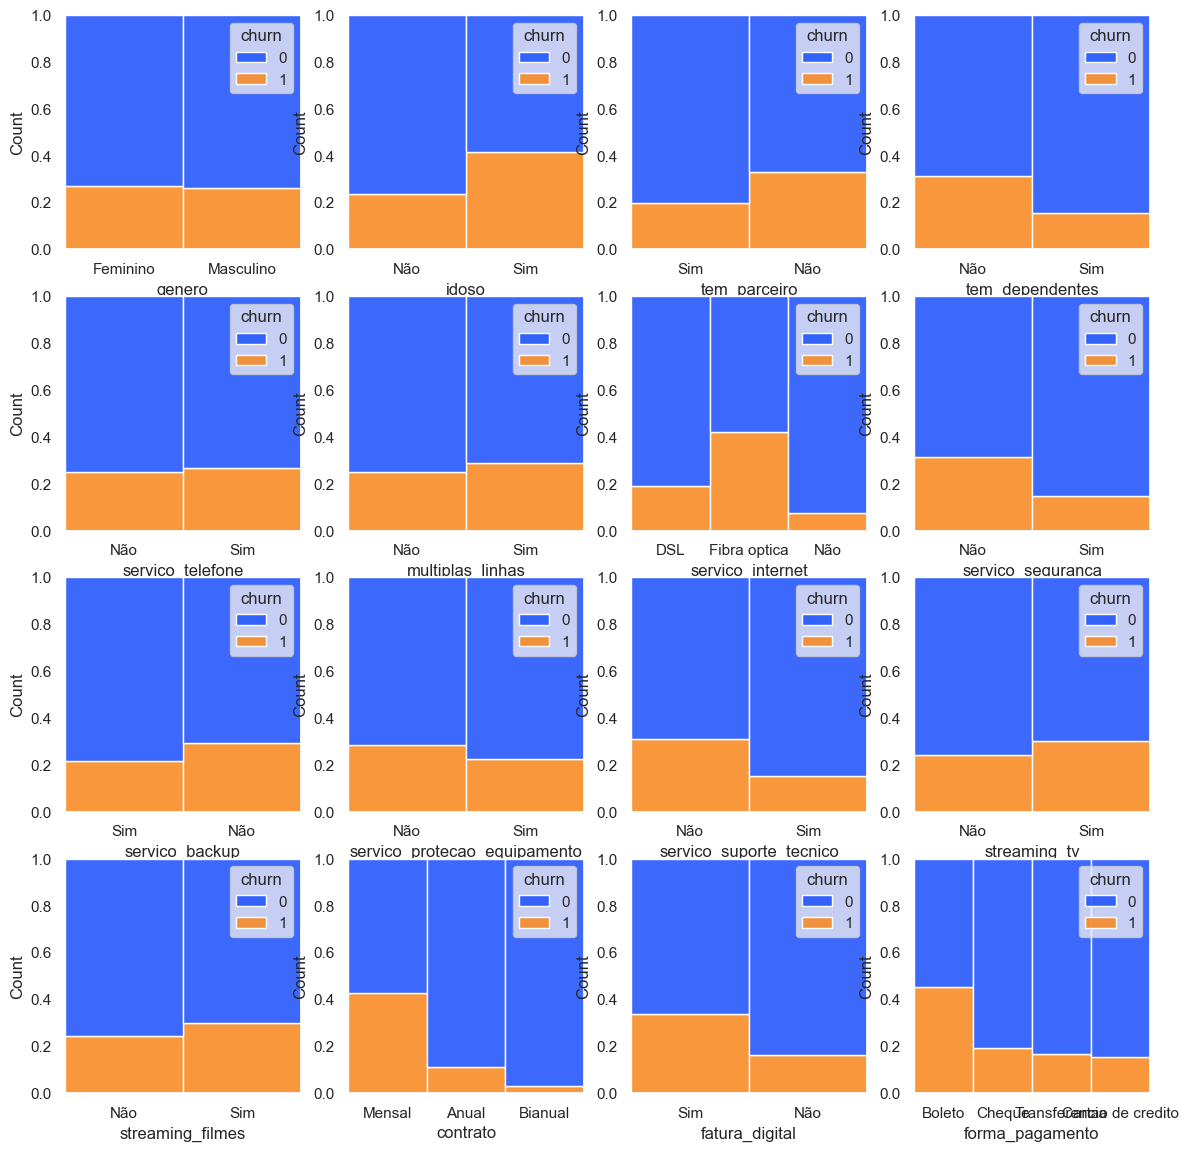

In [36]:
# como são 16 variáveis, podemos construir um grid 4x4
fig, axs = plt.subplots(nrows = 4, ncols = 4, figsize= (14, 14))

for i, coluna in enumerate(colunas_categoricas):
    sns.histplot(x = coluna, data = df_churn, hue = 'churn',  multiple = 'fill', ax = axs.flat[i])
    
plt.show()

Agora vamos arrumar a sujeira do gráfico e deixá-lo visualmente decente e legível

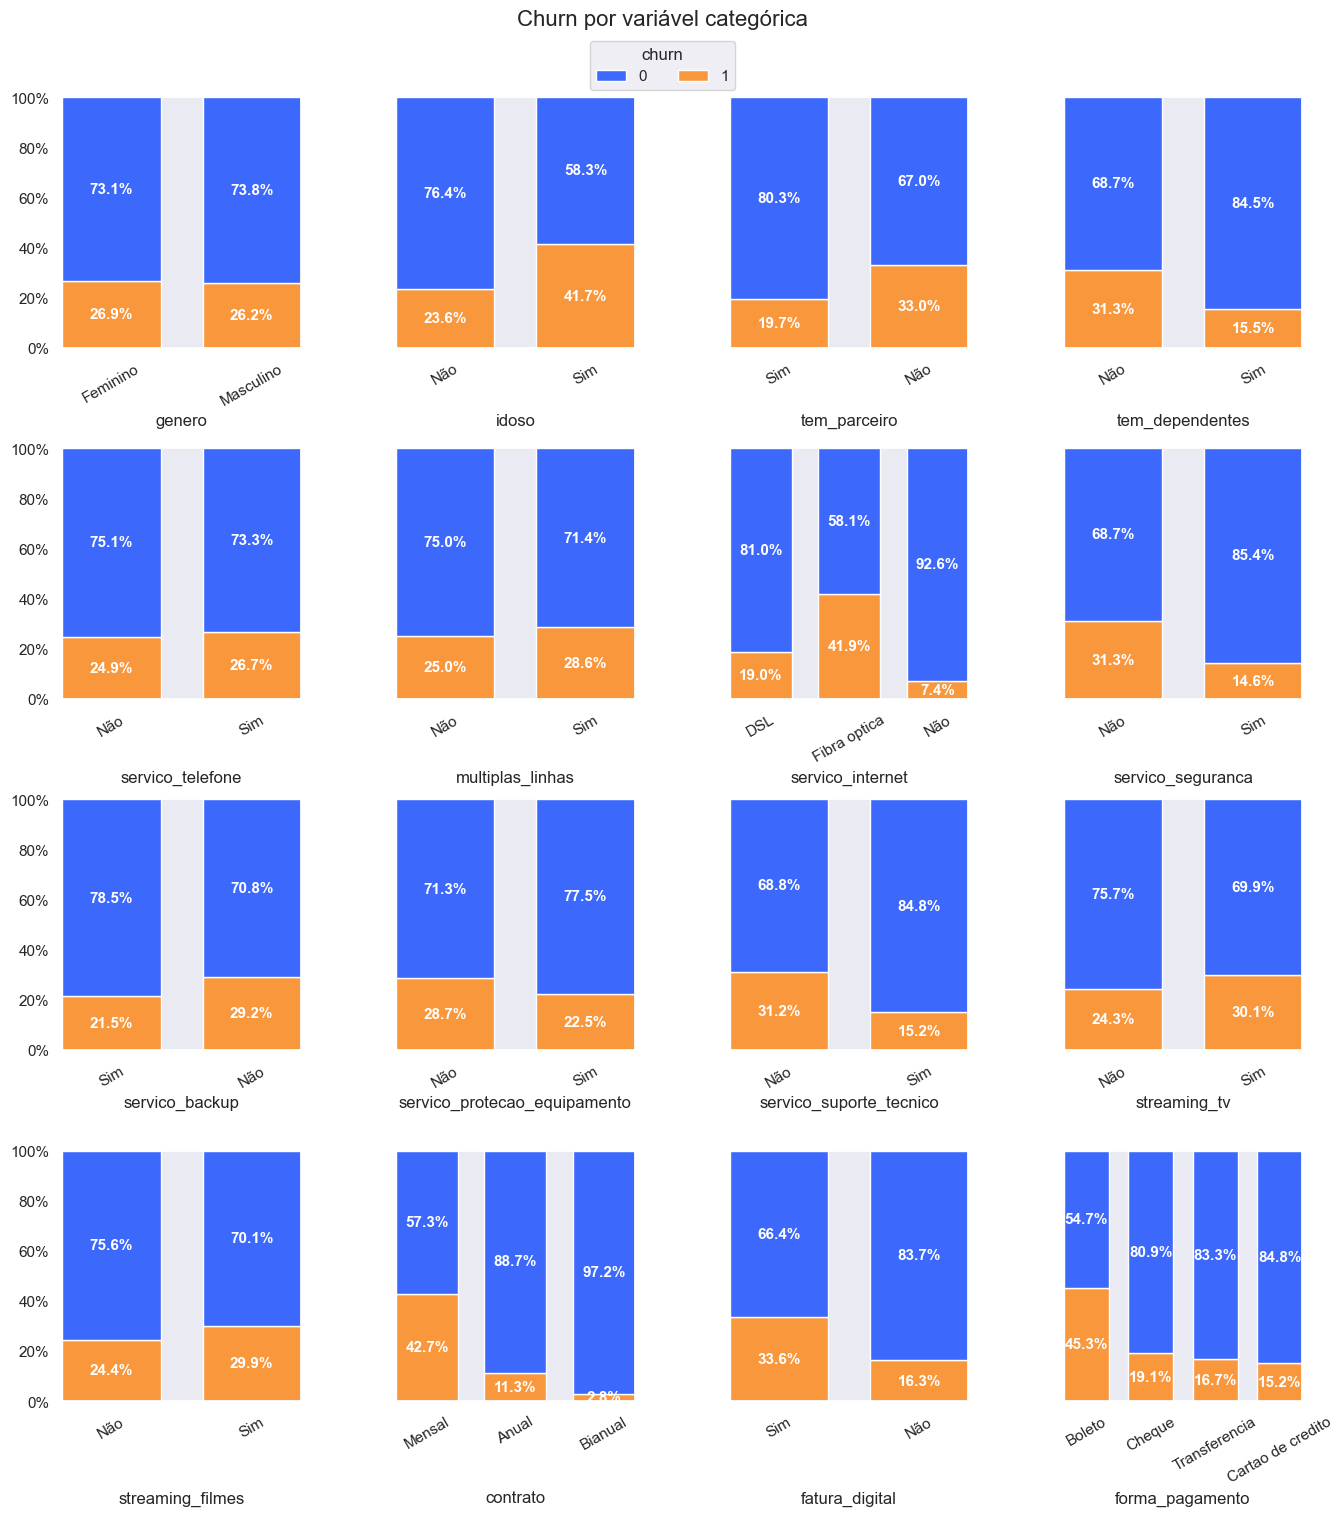

In [37]:
from matplotlib.ticker import PercentFormatter

# sharey = em cada linha, o eixo y é compartilhado, pois todos os gráficos têm o eixo y entre o e 1 (ou seja, 0% e 100%)
fig, axs = plt.subplots(nrows = 4, ncols = 4, figsize= (16, 16), sharey= True)

for i, coluna in enumerate(colunas_categoricas):
    h = sns.histplot(x = coluna, data = df_churn, hue = 'churn', multiple = 'fill', ax = axs.flat[i], stat = 'percent', shrink=0.7)
    h.tick_params(axis = 'x', labelrotation = 30)
    # transformando o eixo y em percentual
    h.yaxis.set_major_formatter(PercentFormatter(1))
    h.set_ylabel('')
    
    #colocando os rótulos em cada barrinha
    for barra in h.containers:
        h.bar_label(barra, label_type='center', labels = [f'{parte.get_height():.1%}' for parte in barra], color = 'white', weight = 'bold', fontsize=11)
    
    # removendo a legenda de cada subplot, salvando o seu valor para colocar como legenda da figura, conforme já feito anteriormente
    legend = h.get_legend()
    legend.remove()
    
# resgatando o valor da legenda.    
labels = [text.get_text() for text in legend.get_texts()]

fig.legend(handles = legend.legend_handles, labels=labels, loc = 'upper center', ncols = 2, title = 'churn', bbox_to_anchor = (0.5, 0.965))
fig.suptitle('Churn por variável categórica', fontsize = 16)

fig.align_labels()

# fazendo ajustes nos subplots para espaçar melhor as barras
plt.subplots_adjust(wspace= 0.4, hspace=0.4, top = 0.925)
plt.show()

Ficou faltando um gráfico simples, que é o gráfico de barras (barplot). Vamos utilizá-lo para algo um pouco diferentes, que seria uma "correlação" das variáveis categóricas com o churn. 

Mas como assim uma correlação? Simples: transformando a variável de churn em um booleano e fazendo o mesmo com as categóricas, com a criação de dummies.

Lembrando o conceito de uma dummy: por exemplo, pegamos a variável "gênero", que no Dataset tem as opções "Masculino" e "Feminino". Então a a transformamos em 2 variáveis, "genero_Masculino" e "genero_Feminino", com valores True ou False. Obviamente que, para cada linha, apenas 1 coluna terá o valor True.

In [39]:
df_churn['churn'] = df_churn['churn'].replace({'Sim': 1, 'Não': 0})

In [29]:

df_dummies = pd.get_dummies(df_churn)
df_dummies.head()

,meses_na_empresa,valor_mensal,total_gasto,churn,genero_Feminino,genero_Masculino,idoso_Não,idoso_Sim,tem_parceiro_Não,tem_parceiro_Sim,...,streaming_filmes_Sim,contrato_Anual,contrato_Bianual,contrato_Mensal,fatura_digital_Não,fatura_digital_Sim,forma_pagamento_Boleto,forma_pagamento_Cartao de credito,forma_pagamento_Cheque,forma_pagamento_Transferencia
0,1,29.85,29.85,0,True,False,True,False,False,True,...,False,False,False,True,False,True,True,False,False,False
1,34,56.95,1889.50,0,False,True,True,False,True,False,...,False,True,False,False,True,False,False,False,True,False
2,2,53.85,108.15,1,False,True,True,False,True,False,...,False,False,False,True,False,True,False,False,True,False
3,45,42.30,1840.75,0,False,True,True,False,True,False,...,False,True,False,False,True,False,False,False,False,True
4,2,70.70,151.65,1,True,False,True,False,True,False,...,False,False,False,True,False,True,True,False,False,False


In [40]:
# criando uma tabela de correlações com a coluna churn
churn_corr = df_dummies.corr()['churn'].sort_values(ascending=False)
print(churn_corr)

churn                                1.000000
contrato_Mensal                      0.405103
servico_internet_Fibra optica        0.308020
forma_pagamento_Boleto               0.301919
valor_mensal                         0.193356
fatura_digital_Sim                   0.191825
servico_seguranca_Não                0.171226
servico_suporte_tecnico_Não          0.164674
tem_dependentes_Não                  0.164221
idoso_Sim                            0.150889
tem_parceiro_Não                     0.150448
servico_backup_Não                   0.082255
servico_protecao_equipamento_Não     0.066160
streaming_tv_Sim                     0.063228
streaming_filmes_Sim                 0.061382
multiplas_linhas_Sim                 0.040102
servico_telefone_Sim                 0.011942
genero_Feminino                      0.008612
genero_Masculino                    -0.008612
servico_telefone_Não                -0.011942
multiplas_linhas_Não                -0.040102
streaming_filmes_Não              

C:\Users\gmcos\AppData\Local\Temp\ipykernel_3612\1636111231.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  b = sns.barplot(x=churn_corr[1:].index, y=churn_corr[1:].values, palette='twilight_shifted')


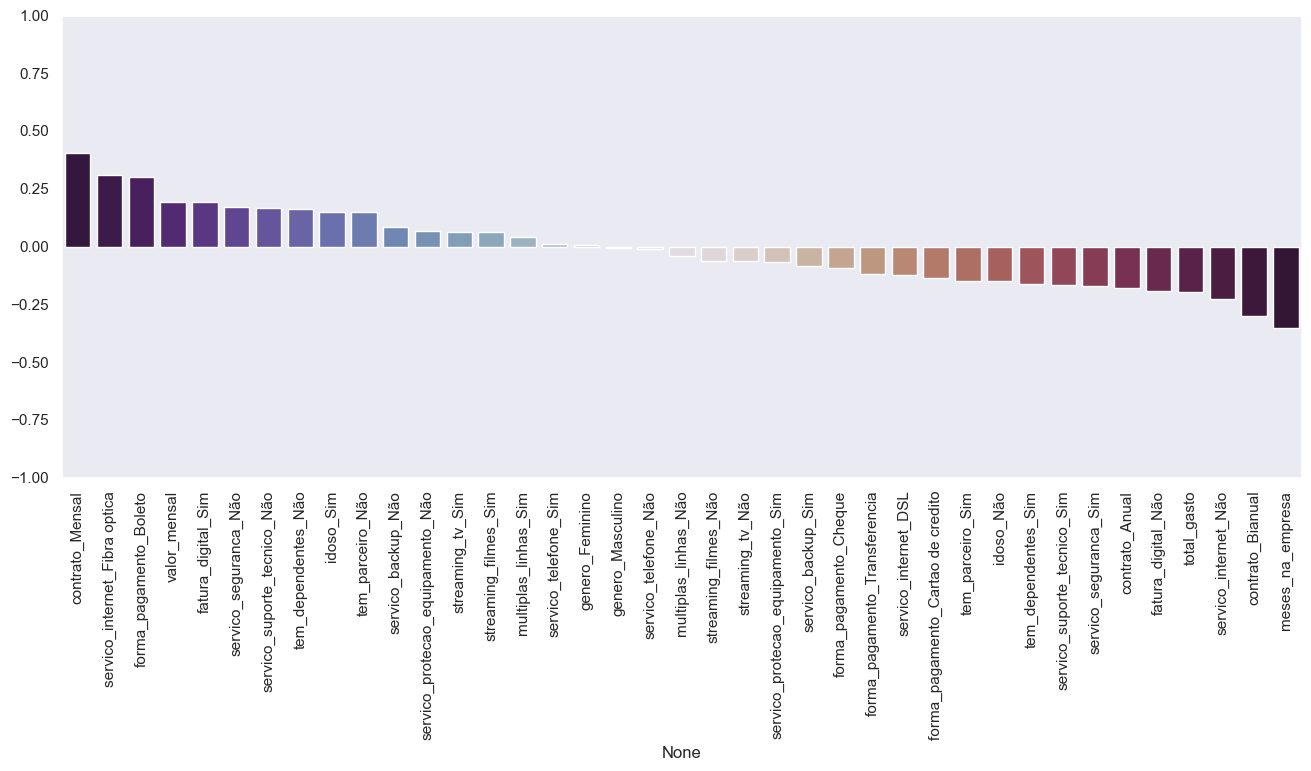

In [48]:
fig, ax = plt.subplots(figsize = (16,6))

# lembrando que não usaremos a linha da 'churn_corr' que se refere ao próprio churn
b = sns.barplot(x=churn_corr[1:].index, y=churn_corr[1:].values, palette='twilight_shifted')
b.tick_params(axis = 'x', rotation = 90)
ax.set_ylim(-1, 1)

plt.show()

Uma última obs: eu particularmente gosto da paleta "twilight_shifted" para gráficos falando de correlação. Isso porque é preciso lembrar que uma correlação próxima a =1 é uma correlação forte assim como uma correlação próxima a 1, embora em sentidos opostos. Por isso, paletas como a "coolwarm" ou outras que variam de uma cor fria para uma quente podem dar a impressão de que a correlação exibida na cor "fria" é fraca.